In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:

def generate_data(n_samples=300, n_clusters=4, cluster_std=0.60):
    centers = np.random.rand(n_clusters, 2) * 10  
    X = []
    for center in centers:
        X.append(center + np.random.randn(n_samples // n_clusters, 2) * cluster_std)
    return np.vstack(X), centers


In [45]:
class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, tolerance=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tolerance = tolerance

    def fit(self, X):
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            distances = self.compute_distances(X)
            labels = np.argmin(distances, axis=1)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.linalg.norm(new_centroids - self.centroids) < self.tolerance:
                break
            self.centroids = new_centroids

        self.labels_ = labels

    def compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

    def average_diameter(self, X):
        distances = self.compute_distances(X)
        avg_diameters = []
        for i in range(self.n_clusters):
            cluster_points = X[self.labels_ == i]
            if len(cluster_points) > 0:
                avg_diameter = np.mean(distances[self.labels_ == i][:, i])
                avg_diameters.append(avg_diameter)
        return np.mean(avg_diameters)

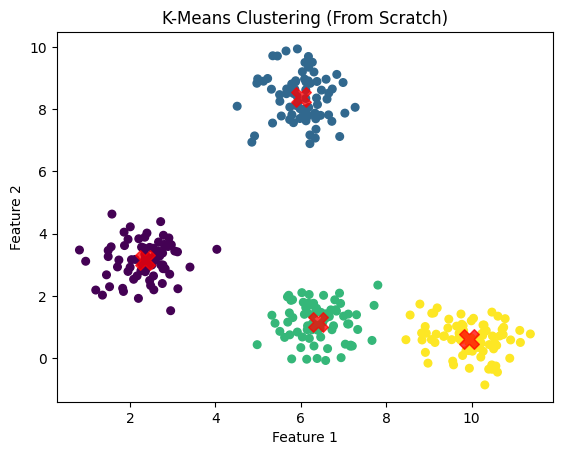

In [46]:
X, true_centers = generate_data()

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=30, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering (From Scratch)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

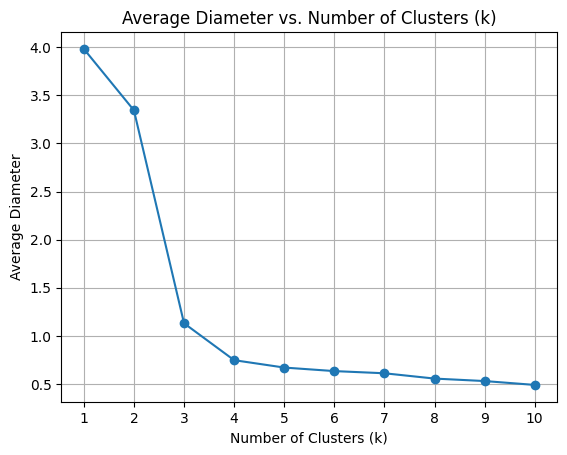

In [47]:
# Determine optimal k
k_values = range(1, 11)
avg_diameters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    avg_diameter = kmeans.average_diameter(X)
    avg_diameters.append(avg_diameter)

# Plotting average diameter vs k
plt.plot(k_values, avg_diameters, marker='o')
plt.title("Average Diameter vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Diameter")
plt.xticks(k_values)
plt.grid()
plt.show()
